In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import imageio
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from dnn_functions import initialize_parameters_deep, L_model_backward, L_model_forward, update_parameters, compute_cost

In [4]:
# GRADED FUNCTION: n_layer_model
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False, plot_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    parameters = initialize_parameters_deep(layers_dims)

    costs = []  # keep track of cost
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training example
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))

    # plot the cost
    if plot_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    return parameters

In [5]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """
    m = X.shape[1]
    p = np.zeros((1, m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    print(np.sum((p == y)))
    print("Accuracy: " + str(float(np.sum((p == y))) / m))

    return p

In [7]:
def print_mislabeled_images(classes, X, y, p):
    """
    :param classes: example classes(cat or non-cat)
    :param X: data set of examples
    :param y: labels of examples
    :param p: predicts of examples
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0)  # set default size of plots
    num_images = len(mislabeled_indices[0])

    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:, index].reshape(64, 64, 3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0, index])].decode("utf-8") +
                  " \n Class: " + classes[y[0, index]].decode("utf-8"))

    plt.show()

Cost after iteration 0: 0.715732
Cost after iteration 100: 0.674738
Cost after iteration 200: 0.660337
Cost after iteration 300: 0.646289
Cost after iteration 400: 0.629813
Cost after iteration 500: 0.606006
Cost after iteration 600: 0.569004
Cost after iteration 700: 0.519797
Cost after iteration 800: 0.464157
Cost after iteration 900: 0.408420
Cost after iteration 1000: 0.373155
Cost after iteration 1100: 0.305724
Cost after iteration 1200: 0.268102
Cost after iteration 1300: 0.238725
Cost after iteration 1400: 0.206323
Cost after iteration 1500: 0.179439
Cost after iteration 1600: 0.157987
Cost after iteration 1700: 0.142404
Cost after iteration 1800: 0.128652
Cost after iteration 1900: 0.112443
Cost after iteration 2000: 0.085056
Cost after iteration 2100: 0.057584
Cost after iteration 2200: 0.044568
Cost after iteration 2300: 0.038083
Cost after iteration 2400: 0.034411
208
Accuracy: 0.9952153110047847
39
Accuracy: 0.78
1
Accuracy: 1.0


C:\Users\madhu\AppData\Local\Temp\ipykernel_47268\4106664093.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Prediction: " + classes[int(my_predict[0])].decode("utf-8") +


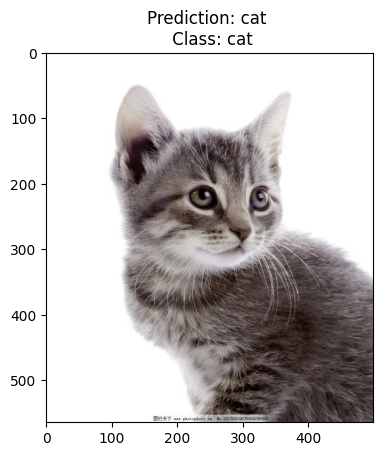

In [11]:
if __name__=="__main__":
    # Load and standard dataset
    train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

    train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255
    test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255

    # Training the model
    layers_dims = [12288, 20, 7, 5, 1]  # 5-layer model
    parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True, plot_cost=False)

    # Model accuracy
    p_train = predict(train_x, train_y, parameters)
    p_test = predict(test_x, test_y, parameters)

    # Plot the mislabeled images
    # print_mislabeled_images(classes, test_x, test_y, p_test)

    # Try own images
    my_image = "my_image2.JPG"
    image = Image.open(my_image)
    image_resized=image.resize((64,64))
    image_array=np.array(image_resized)
    my_image=image_array.reshape((64*64*3,1))
    '''# Ensure the image has three channels (RGB)
    if image.ndim == 2:
    # Convert grayscale to RGB by duplicating the single channel
        image = np.stack((image,) * 3, axis=-1) '''
    #my_image = scipy.misc.imresize(image, size=(64, 64)).reshape(64 * 64 * 3, 1)
    my_label = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
    my_predict = predict(my_image, my_label, parameters)

    plt.imshow(image)
    plt.title("Prediction: " + classes[int(my_predict[0])].decode("utf-8") +
              " \n Class: " + classes[int(my_label[0])].decode("utf-8"))
    plt.show()
